In [1]:
import openpiv.tools
import openpiv.process
import openpiv.preprocess
import openpiv.validation
import openpiv.filters
import openpiv.scaling

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
# import pandas as pd
import os
# import cv2s
# from scipy import ndimage

In [3]:
winsize = 32  
searchsize = 64  
overlap = 16  
dt = 462.44*10**(-6)

In [4]:
# for i in range(200,300,100):
i = 200

File1 = 'frame%05d.png' % i
ii = i+1
File2 = 'frame%05d.png' %(ii)
print('Frames ', i, ' and ', ii)

img_a  = openpiv.tools.imread( File1)
img_b  = openpiv.tools.imread( File2)

frame_a = img_a[130:400,200:1200]
frame_b = img_b[130:400,200:1200]

#rotation angle in degree
# frame_a = ndimage.rotate(frame_a, -1)
# frame_b = ndimage.rotate(frame_b, -1)

Frames  200  and  201


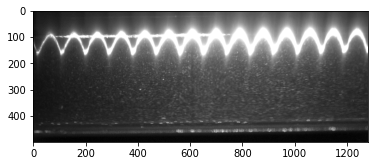

In [5]:
plt.imshow(img_a,cmap=cm.gray)

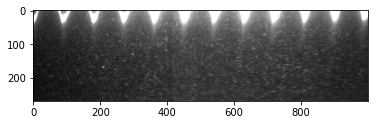

In [6]:
plt.imshow(frame_a,cmap=cm.gray)

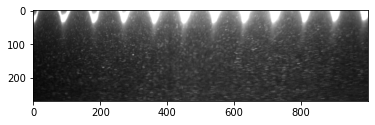

In [7]:
plt.imshow(frame_b,cmap=cm.gray)

In [16]:
openpiv.tools.imsave('tmp.png',frame_a)

Lossy conversion from float64 to uint8. Range [16.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


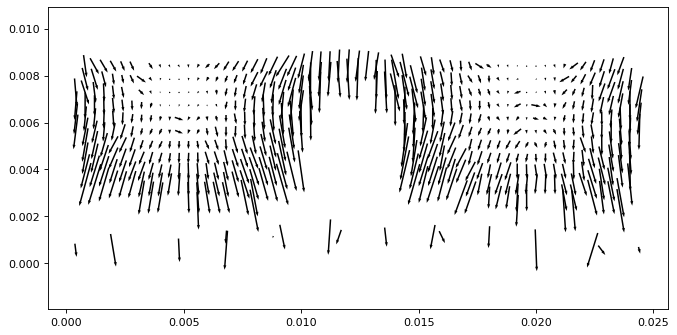

In [8]:
u0, v0, sig2noise = openpiv.process.extended_search_area_piv( frame_a.astype(np.int32),
                                                             frame_b.astype(np.int32), 
                                                         window_size=winsize, 
                                                         overlap=overlap, 
                                                         dt=dt, 
                                                         search_area_size=searchsize, 
                                                         sig2noise_method='peak2peak' )
x, y = openpiv.process.get_coordinates( image_size=frame_a.shape, window_size=winsize, overlap=overlap )


# Scales 
u0 = u0/80*2*0.001
v0 = v0/235*8.225*0.001
x = x/80*2*0.001
y = y/235*8.225*0.001


u0, v0, mask = openpiv.validation.global_val(u0,v0,(-0.1,0.1),(-0.3,0))


fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.quiver(x,y,u0,v0,
           angles='xy', scale_units='xy', scale = 160,
           headlength = 3, headwidth = 2, headaxislength = 3, pivot = 'mid')
plt.axis('equal')
plt.clim(0,0.06)
# plt.colorbar(orientation='horizontal')
pic = 'Run20_1_%05d.png' % i
plt.savefig(pic, dpi=600, facecolor='w', edgecolor='w')
plt.show()
plt.close()

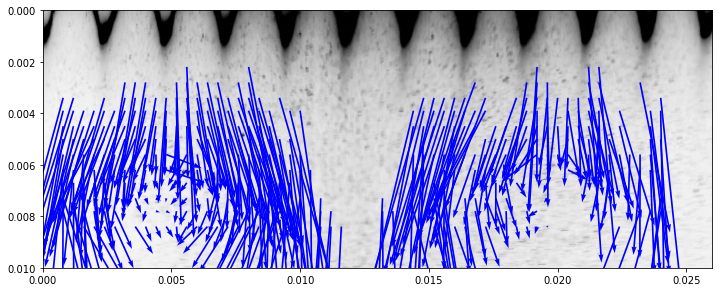

In [35]:
openpiv.tools.save(x, y, u0, v0, mask, 'tmp.txt' )
fig, ax = plt.subplots(figsize=(12,12))
openpiv.tools.display_vector_field('tmp.txt', ax=ax, scaling_factor=10000, scale=1, width=0.0025, on_img=True, image_name='tmp.png');

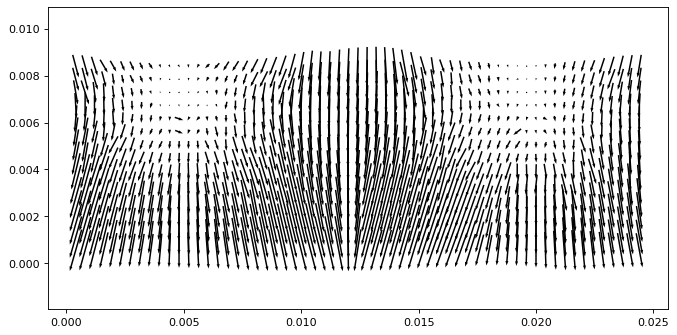

In [14]:
u1, v1, mask = openpiv.validation.sig2noise_val( u0, v0, sig2noise, threshold =1.3)
u2, v2 = openpiv.filters.replace_outliers( u1, v1, method='localmean', max_iter=100, kernel_size=1)

fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.quiver(x,y,u2,v2,
           angles='xy', scale_units='xy', scale = 160,
           headlength = 3, headwidth = 2, headaxislength = 3, pivot = 'mid')
plt.axis('equal')
plt.clim(0,0.06)
# plt.colorbar(orientation='horizontal')
pic = 'Run20_2_%05d.png' % i
plt.savefig(pic, dpi=600, facecolor='w', edgecolor='w')
plt.show()
plt.close()

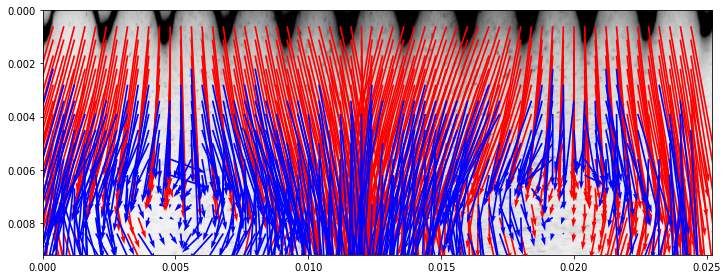

In [40]:
openpiv.tools.save(x, y, u2, v2, mask, 'tmp2.txt' )
fig, ax = plt.subplots(figsize=(12,12))
openpiv.tools.display_vector_field('tmp2.txt', ax=ax, scaling_factor=20000, scale=1, width=0.0025, on_img=True, image_name='tmp.png');